In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.utils import to_categorical

In [ ]:
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()


170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
train_images,test_images=train_images/255.0,test_images/255.0

In [ ]:
train_labels=to_categorical(train_labels,10)
test_labels=to_categorical(test_labels,10)

model=models.Sequential()

In [ ]:

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))

In [ ]:
model.add(layers.Conv@D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))


In [ ]:
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 64)                692288    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                        

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )


In [ ]:
history=model.fit(train_images,train_labels,epochs=11,validation_data=(test_images,test_labels))

Epoch 1/11
1563/1563 [==============================] - 81s 51ms/step - loss: 1.8292 - accuracy: 0.2720 - val_loss: 1.5495 - val_accuracy: 0.3973
Epoch 2/11
1563/1563 [==============================] - 77s 49ms/step - loss: 1.3580 - accuracy: 0.5011 - val_loss: 1.2189 - val_accuracy: 0.5662
Epoch 3/11
1563/1563 [==============================] - 75s 48ms/step - loss: 1.1233 - accuracy: 0.6007 - val_loss: 1.1589 - val_accuracy: 0.5979
Epoch 4/11
1563/1563 [==============================] - 79s 51ms/step - loss: 0.9703 - accuracy: 0.6591 - val_loss: 1.1077 - val_accuracy: 0.6242
Epoch 5/11
1563/1563 [==============================] - 78s 50ms/step - loss: 0.8501 - accuracy: 0.7032 - val_loss: 1.0416 - val_accuracy: 0.6442
Epoch 6/11
1563/1563 [==============================] - 80s 51ms/step - loss: 0.7379 - accuracy: 0.7456 - val_loss: 1.0991 - val_accuracy: 0.6381
Epoch 7/11
1563/1563 [==============================] - 74s 47ms/step - loss: 0.6421 - accuracy: 0.7793 - val_loss: 1.1131 -

In [ ]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print("\ntest Accuracy: {test_acc}")

313/313 [==============================] - 4s 12ms/step - loss: 1.3977 - accuracy: 0.6491

test Accuracy: {test_acc}


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

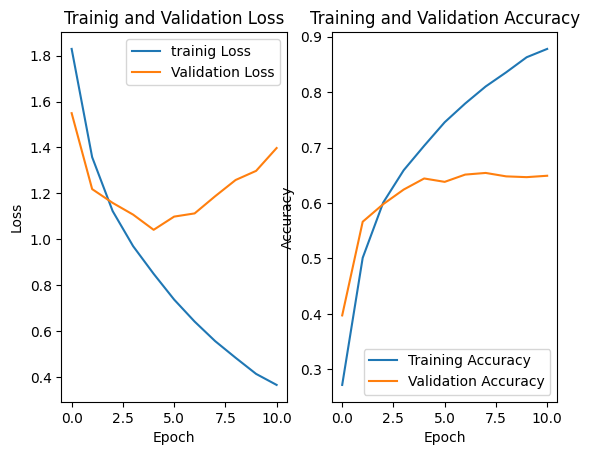

In [ ]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label="trainig Loss")
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Trainig and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()